In [2]:
import linear_hypostomatous_model as lhm
import matplotlib.pylab as pl
from tqdm import tqdm 
import pandas as pd 
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm
import scicolor

def generate_colors(colormap_name, N):
    cmap = get_cmap(colormap_name)
    return [cmap(i / (N - 1)) for i in range(N)]

def hex2rgb(hex):
    rbg = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
    return tuple([c/255 for c in rbg])


mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
fontsize = 12
# set tick font size
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize


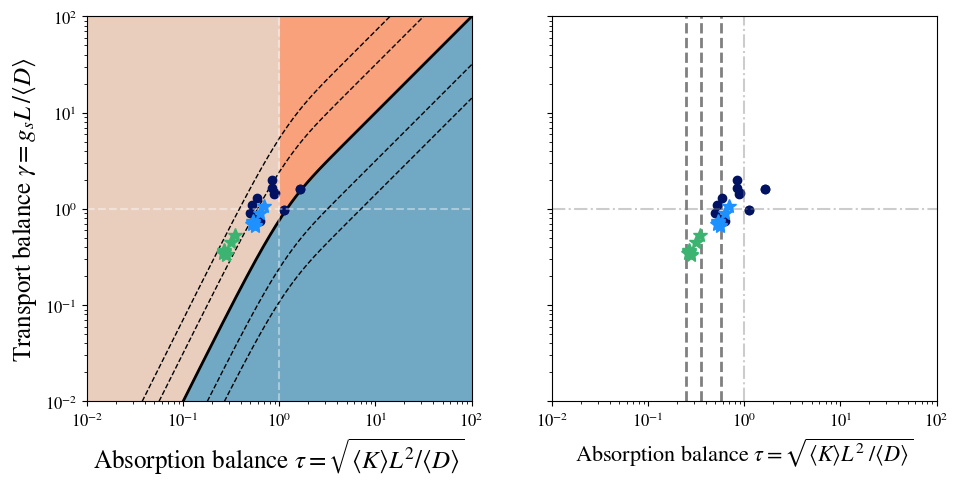

In [4]:
# load data for amphistomatous correction visualization
df = pd.read_csv('data/Knauer2022_top9_tau_gamma.csv', sep=';', decimal=',')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), sharey=True)
# ax1 for 2D zoom and ax2 for 3C zoom

# Plot 2D 
zeta_ = 0.1
xmin, xmax = 0.01, 100

taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# COLORS
# I : stomata
colorI = hex2rgb('71A8C4')      #hex2rgb('67a9b9')       #hex2rgb('00b9bd') #'teal' 
# II : absorption capacity
colorII = hex2rgb('EACEBD')      #hex2rgb('629076')      #hex2rgb('004853') #'darkgoldenrod'
# III : IAS
colorIII = hex2rgb('F8A17B')     #hex2rgb('dd7308')     #hex2rgb('f63700') #'seagreen'
#
point_colors = [hex2rgb('001261'), hex2rgb('226061'), hex2rgb('B40F20')]

# shading
ax1.fill_between(taus, borders(taus, 1), xmin, color=colorI)
ax1.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
ax1.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
ax1.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
ax1.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
ax1.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax1.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
ax1.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)

# plot the data 
hypo_color = hex2rgb('001261')
amphi_color = 'dodgerblue' #hex2rgb('226061')

for i in df.index.tolist():
    if df.loc[i, 'hypostomatous'] == 'yes':
        ax1.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], 'o', color=hypo_color, markersize=6)
    else:
        ax1.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], '*', color=amphi_color, markersize=10, zorder=3)
        ax1.plot(df.loc[i, 'tau']/2, df.loc[i, 'gamma']/2, '*', color='mediumseagreen', markersize=10, zorder=3)


ax1.set_xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$', fontsize=18)
ax1.set_ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=18)
ax1.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
ax1.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
#ax1.plot([1, 1] ,[1.3, 100], color='forestgreen')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(xmin, xmax)
ax1.set_aspect('equal')

#___________________________________________________________-
# plot 3C

lines = [0.248, 0.352, 0.570] #1%, 2%, 5%, 10% relative error
for line in lines:
    ax2.vlines(line, 0.01, 100, color='grey', linestyle='--', linewidth=2)

for i in df.index.tolist():
    if df.loc[i, 'hypostomatous'] == 'yes':
        ax2.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], 'o', color=hypo_color, markersize=6)
    else:
        ax2.plot(df.loc[i, 'tau'], df.loc[i, 'gamma'], '*', color=amphi_color, markersize=10, zorder=3)
        ax2.plot(df.loc[i, 'tau']/2, df.loc[i, 'gamma']/2, '*', color='mediumseagreen', markersize=10, zorder=3)

#
ax2.set_xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 \; / \langle D\rangle}$', fontsize=16)
ax2.plot([1, 1], [xmin, xmax], color='grey', linestyle='-.', alpha=0.4)
ax2.plot([xmin, xmax], [1, 1],  color='grey', linestyle='-.', alpha=0.4)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(xmin, xmax)
ax2.set_aspect('equal')
plt.savefig('figs/S8_amphi_correction.svg')

plt.show()
